In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0) # Import Libraries

# For visualization
import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

# Define data directories and annotation files
dataDir = 'Dataset/val'
dataType = 'COCO_val_annos'
mul_dataType = 'COCO_mul_val_annos'
annFile = f'{dataDir}/{dataType}.json'
mul_annFile = f'{dataDir}/{mul_dataType}.json'
img_dir = "Dataset/img"

# Initialize COCO API for instance annotations
coco = COCO(annFile)
mul_coco = COCO(mul_annFile)

# Add your code for processing and visualization here


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [3]:
# display categories and supercategories

#Single Class #Damage dataset
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(nms)))

#Multi Class #Parts dataset

mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
mul_nms=[cat['name'] for cat in mul_cats]
print('COCO categories for parts: \n{}\n'.format(', '.join(mul_nms)))

mul_nms = set([mul_cat['supercategory'] for mul_cat in mul_cats])
print('COCO supercategories for parts: \n{}\n'.format(', '.join(mul_nms)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



In [4]:
# get all images containing 'damage' category, select one at random
catIds = coco.getCatIds(catNms=['damage']);
imgIds = coco.getImgIds(catIds=catIds );


random_img_id = random.choice(imgIds)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))



7 image id was selected at random from the [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


In [5]:


# Load the image
imgId = coco.getImgIds(imgIds = [random_img_id])
img = coco.loadImgs(imgId)[0]
print("Image details \n",img)



Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '74.jpg', 'flickr_url': '', 'height': 1024, 'id': 7, 'license': 1, 'width': 1024}


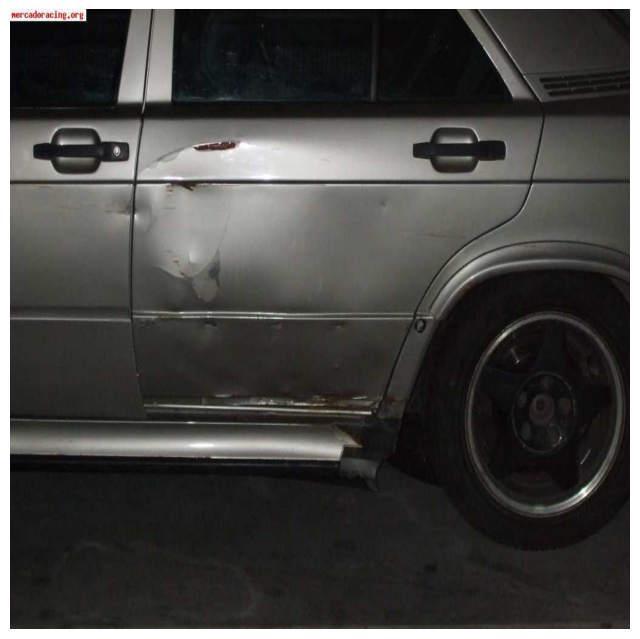

In [6]:
I = io.imread('./Dataset/img/10.jpg')
plt.axis('off')
plt.imshow(I)
plt.show()

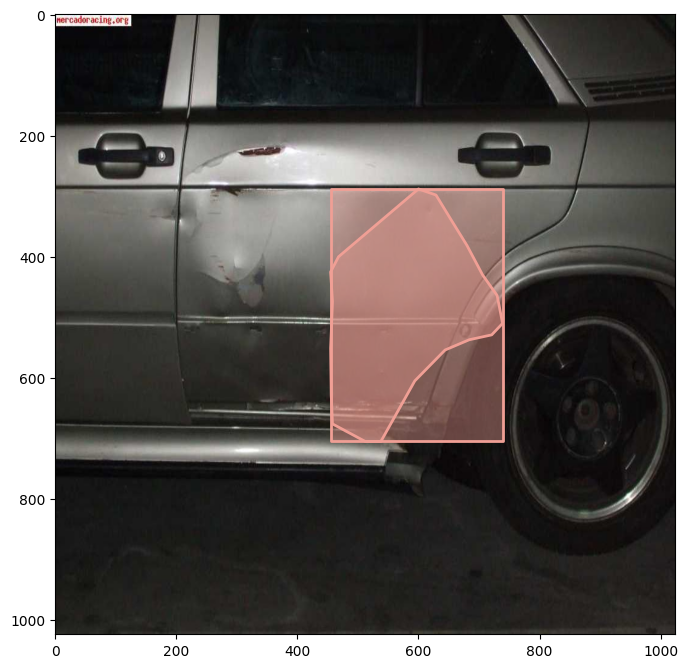

In [7]:
annIds = coco.getAnnIds(imgIds=imgId,iscrowd=None)
anns = coco.loadAnns(annIds)
plt.imshow(I)
plt.axis('on')
coco.showAnns(anns, draw_bbox=True )

In [8]:
mul_annIds = mul_coco.getAnnIds(imgIds=imgId,iscrowd=None)
mul_anns = mul_coco.loadAnns(mul_annIds)

category_map = dict()

for ele in list(mul_coco.cats.values()):
    category_map.update({ele['id']:ele['name']})
    
category_map


{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}

Parts are: ['door', 'hood', 'headlamp', 'front_bumper']


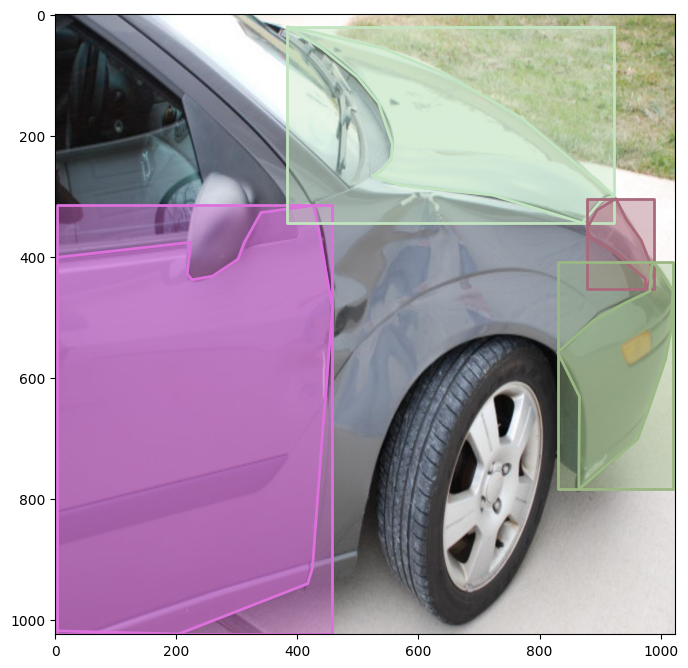

In [9]:
parts = []
for region in mul_anns:
    parts.append(category_map[region['category_id']])

print("Parts are:", parts) 

#Plot Parts
I = io.imread(img_dir + '/' + img['file_name'])
plt.imshow(I)
plt.axis('on')
mul_coco.showAnns(mul_anns, draw_bbox=True )

Prep


In [4]:
import os
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Set base params
plt.rcParams["figure.figsize"] = [16, 9]

dataset_dir = "./Dataset"
img_dir = "img/"
train_dir = "train/"
val_dir = "val/"

# Ensure the paths are correct
train_ann_file = os.path.join(dataset_dir, train_dir, "COCO_train_annos.json")
val_ann_file = os.path.join(dataset_dir, val_dir, "COCO_val_annos.json")
print(f"Train Annotation File: {train_ann_file}")
print(f"Validation Annotation File: {val_ann_file}")

from detectron2.data import MetadataCatalog, DatasetCatalog

# Unregister the existing dataset
if "car_dataset_train" in DatasetCatalog:
    DatasetCatalog.remove("car_dataset_train")
if "car_dataset_val" in DatasetCatalog:
    DatasetCatalog.remove("car_dataset_val")

# Remove metadata
if "car_dataset_train" in MetadataCatalog.list():
    MetadataCatalog.pop("car_dataset_train")
if "car_dataset_val" in MetadataCatalog.list():
    MetadataCatalog.pop("car_dataset_val")

# Register datasets
from detectron2.data.datasets import register_coco_instances
register_coco_instances("car_dataset_train", {}, train_ann_file, os.path.join(dataset_dir, img_dir))
register_coco_instances("car_dataset_val", {}, val_ann_file, os.path.join(dataset_dir, img_dir))

# Load datasets
dataset_dicts = DatasetCatalog.get("car_dataset_train")
metadata_dicts = MetadataCatalog.get("car_dataset_train")


# Load datasets
dataset_dicts = DatasetCatalog.get("car_dataset_train")
metadata_dicts = MetadataCatalog.get("car_dataset_train")


Train Annotation File: ./Dataset\train/COCO_train_annos.json
Validation Annotation File: ./Dataset\val/COCO_val_annos.json
[11/09 05:58:03 d2.data.datasets.coco]: Loaded 59 images in COCO format from ./Dataset\train/COCO_train_annos.json
[11/09 05:58:03 d2.data.datasets.coco]: Loaded 59 images in COCO format from ./Dataset\train/COCO_train_annos.json


Model train


In [23]:
class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [1]:
import os
import torch
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Import common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# Import detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Set base params
plt.rcParams["figure.figsize"] = [16, 9]

dataset_dir = "./Dataset"
img_dir = "img/"
train_dir = "train/"
val_dir = "val/"

# Ensure the paths are correct
train_ann_file = os.path.join(dataset_dir, train_dir, "COCO_train_annos.json")
val_ann_file = os.path.join(dataset_dir, val_dir, "COCO_val_annos.json")
print(f"Train Annotation File: {train_ann_file}")
print(f"Validation Annotation File: {val_ann_file}")

# Register datasets
from detectron2.data.datasets import register_coco_instances
register_coco_instances("car_dataset_train", {}, train_ann_file, os.path.join(dataset_dir, img_dir))
register_coco_instances("car_dataset_val", {}, val_ann_file, os.path.join(dataset_dir, img_dir))

# Load datasets
dataset_dicts = DatasetCatalog.get("car_dataset_train")
metadata_dicts = MetadataCatalog.get("car_dataset_train")

# Custom CocoTrainer class
class CocoTrainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            os.makedirs("coco_eval", exist_ok=True)
            output_folder = "coco_eval"
        return COCOEvaluator(dataset_name, cfg, False, output_folder)

# Configure model for CPU
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("car_dataset_train",)
cfg.DATASETS.TEST = ("car_dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001  # Pick a good LR
cfg.SOLVER.WARMUP_ITERS = 700
cfg.SOLVER.MAX_ITER = 800 # Adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (400, 600)  # Adjust milestones to be within total iterations
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # Faster, and good enough for this dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Only has one class (damage), background is counted implicitly
cfg.MODEL.RETINANET.NUM_CLASSES = 1 # Only has one class (damage), background is counted implicitly
cfg.TEST.EVAL_PERIOD = 600

# Set the device to CPU
cfg.MODEL.DEVICE = "cpu"

# Clear any logs from previous runs
!rm -rf {cfg.OUTPUT_DIR}

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

# Save the trained model weights
model_path = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
torch.save(trainer.model.state_dict(), model_path)

print("Training complete. Model saved to", model_path)


Train Annotation File: ./Dataset\train/COCO_train_annos.json
Validation Annotation File: ./Dataset\val/COCO_val_annos.json
[11/08 18:30:44 d2.data.datasets.coco]: Loaded 59 images in COCO format from ./Dataset\train/COCO_train_annos.json


'rm' is not recognized as an internal or external command,
operable program or batch file.


[11/08 18:30:45 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

[11/08 18:30:45 d2.engine.train_loop]: Starting training from iteration 0


c:\Users\walte\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3610.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[11/08 18:40:54 d2.utils.events]:  eta: 6:37:26  iter: 19  total_loss: 1.979  loss_cls: 0.6389  loss_box_reg: 0.3472  loss_mask: 0.6948  loss_rpn_cls: 0.179  loss_rpn_loc: 0.02106    time: 30.3132  last_time: 32.2136  data_time: 0.1788  last_data_time: 0.0030   lr: 1.0407e-06  
[11/08 18:50:56 d2.utils.events]:  eta: 6:26:00  iter: 39  total_loss: 1.879  loss_cls: 0.6288  loss_box_reg: 0.3483  loss_mask: 0.6944  loss_rpn_cls: 0.1669  loss_rpn_loc: 0.0207    time: 29.9203  last_time: 29.3587  data_time: 0.0027  last_data_time: 0.0022   lr: 1.0836e-06  
[11/08 19:00:41 d2.utils.events]:  eta: 6:14:37  iter: 59  total_loss: 1.914  loss_cls: 0.6167  loss_box_reg: 0.3914  loss_mask: 0.6937  loss_rpn_cls: 0.2026  loss_rpn_loc: 0.02151    time: 29.6945  last_time: 31.3164  data_time: 0.0024  last_data_time: 0.0027   lr: 1.1264e-06  
[11/08 19:10:14 d2.utils.events]:  eta: 6:00:05  iter: 79  total_loss: 1.826  loss_cls: 0.6094  loss_box_reg: 0.3755  loss_mask: 0.6938  loss_rpn_cls: 0.1135  los

In [2]:
def smooth(scalars, weight=0.6):
    """
    Reference: https://github.com/plotly/dash-live-model-training/blob/master/app.py#L163
    """
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed


def plot(logdir: str, savedir: str, smoothing: float = 0.6, no_title=False, no_legend=False, no_axis_labels=False):
    """ re-draw the tf summary events plots  using seaborn
    :param logdir: Path to the directory having event logs
    :param savedir: Path to save the seaborn graphs
    :param smoothing: smoothing window space for the plots
    """
    assert 0 <= smoothing <= 1, 'Smoothing value should be in [0,1]'
    
    plots = []
    
    sns.set(style="darkgrid")
    sns.set_context("paper")

    # Collect data
    # we recognize all files which have tfevents
    scalars_info = {}
    for root, dirs, files in os.walk(logdir):
        for event_file in [x for x in files if 'tfevents' in x]:
            event_path = os.path.join(root, event_file)

            acc = ea.EventAccumulator(event_path)
            acc.Reload()

            # only support scalar now
            scalar_list = acc.Tags()['scalars']
            for tag in scalar_list:
                x = [s.step for s in acc.Scalars(tag)]
                y = [s.value for s in acc.Scalars(tag)]
                data = {'x': x, 'y': y, 'legend': root.split(logdir)[1][1:] if root != logdir else None}
                if tag not in scalars_info:
                    scalars_info[tag] = [data]
                else:
                    scalars_info[tag].append(data)

    # We recognize groups assuming each group name has /
    # And, each group is saved in a separate directory
    for tag, tag_data in scalars_info.items():
        _split = tag.split('/')
        if len(_split) <= 1:
            _path = os.path.join(savedir, 'seaborn')
            _name = _split[0]
        else:
            _path = os.path.join(savedir, 'seaborn', _split[0])
            _name = ''.join(_split[1:])

        os.makedirs(_path, exist_ok=True)

        color_list = list(sns.color_palette(palette='dark', n_colors=len(tag_data)))[::-1]
        for data in tag_data:
            x, y = data['x'], data['y']
            y_smooth = smooth(y, weight=smoothing)
            current_color = color_list.pop()
            _plt = sns.lineplot(x, y, color=colors.to_rgba(current_color, alpha=0.4))
            _legend = data['legend'] if not no_legend else None
            _plt = sns.lineplot(x, y_smooth, label=data['legend'], color=current_color)

        if not no_axis_labels:
            _plt.set(xlabel='x', ylabel='y')
        if not no_title:
            _plt.set_title(_name.capitalize())
        
        plots.append(os.path.join(_path, _name + '.png'))
        plt.savefig(os.path.join(_path, _name + '.png'))
        plt.clf()
    return plots

In [1]:
 import os
import torch
import detectron2
from detectron2.utils.logger import setup_logger

setup_logger()

# Import common libraries
import numpy as np
import json
import cv2
import random
import matplotlib.pyplot as plt
import skimage.io as io
import seaborn as sns  # Import Seaborn

# Import detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader


plots = plot(logdir= './output', savedir= './')

NameError: name 'plot' is not defined